In [1]:
# imports
import os
from PIL import Image
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sampling import *

immat_dir = r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\immature_processed\edges"
mat_dir = r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\mature_processed\edges"

In [7]:
def compute_evals(input_path, k=25, r=2000):
    eval_dict = dict()
    for f in os.listdir(input_path):
        if f != "eigenvalues":
            print(f)
            fname, fext = os.path.splitext(f)
            image = Image.open(os.path.join(input_path, f))
            im_arr = np.array(image)
            im_sample = sample(im_arr)
            evals, _ = GFT(im_sample, k, r)
            eval_dict[f] = evals
    return eval_dict

In [8]:
immat_evals = compute_evals(immat_dir)

iDC-2edge_smoothed.tif
Graph is connected:  True
iDC-3edge_smoothed.tif
Graph is connected:  True
iDC-5-1edge_smoothed.tif
Graph is connected:  True
iDC-5-2edge_smoothed.tif
Graph is connected:  True
iDC-6edge_smoothed.tif
Graph is connected:  True
iDC-7edge_smoothed.tif
Graph is connected:  True
immatureedge_smoothed.tif
Graph is connected:  True


In [9]:
mat_evals = compute_evals(mat_dir)

LPS-DC-2-1edge_smoothed.tif
Graph is connected:  True
LPS-DC-2-2edge_smoothed.tif
Graph is connected:  True
LPS-DC-3edge_smoothed.tif
Graph is connected:  True
LPS-DC-4edge_smoothed.tif
Graph is connected:  True
LPS-DC-5-1edge_smoothed.tif
Graph is connected:  True
LPS-DC-5-2edge_smoothed.tif
Graph is connected:  True
matureedge_smoothed.tif
Graph is connected:  True


In [10]:
with open("immat_evals.pkl", "wb") as f:
    pickle.dump(immat_evals, f)
with open("mat_evals.pkl", "wb") as f:
    pickle.dump(mat_evals, f)

In [2]:
with open("immat_evals.pkl", "rb") as f:
    immat_evals = pickle.load(f)
with open("mat_evals.pkl", "rb") as f:
    mat_evals = pickle.load(f)

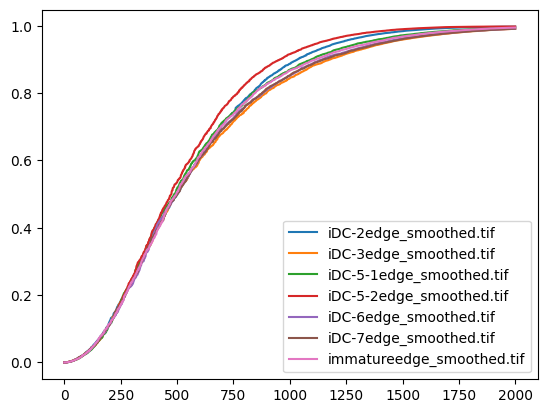

In [5]:
for k in immat_evals.keys():
    plt.plot(immat_evals[k], label=k)
plt.legend()
plt.show()

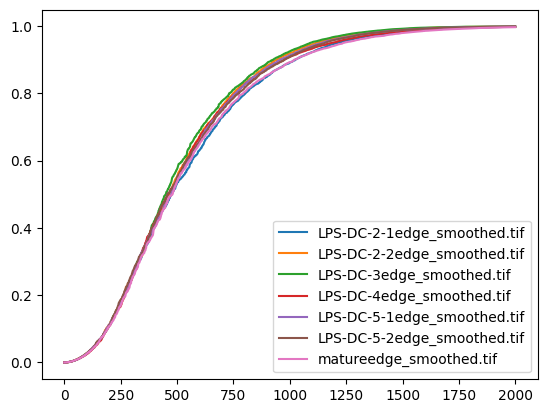

In [6]:
for k in mat_evals.keys():
    plt.plot(mat_evals[k], label=k)
plt.legend()
plt.show()

In [35]:
import copy
#from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
def sg_derivative(evals_dict): # use Savitzky-Golay filter to compute smoothed eigenvalue derivative
    evals_d = dict()
    for k in evals_dict.keys():
        evals = copy.copy(evals_dict[k]).tolist()
        evals = [evals[2], evals[1]] + evals + [evals[-2], evals[-3]]
        d_list = []
        for i in range(2, len(evals)-2):
            derivative = 1/12 * (evals[i-2]-8*evals[i-1]+8*evals[i+1]-evals[i+2]) # Savitzky-Golay filter derivative
            d_list.append(derivative)
        d_list = d_list[2:(len(d_list)-2)]
        for i in range(2, len(evals)-2):
            d_list = gaussian_filter1d(d_list, 5) # convolve with Gaussian filter
        evals_d[k] = d_list
    return evals_d
immat_smoothed_d = sg_derivative(immat_evals)
mat_smoothed_d = sg_derivative(mat_evals)

In [38]:
def evals_derivative(evals_dict):
    evals_d = dict()
    for k in evals_dict.keys():
        evals = evals_dict[k]
        eval_list = []
        for i in range(len(evals)):
            if i < len(evals)-1:
                derivative = evals[i+1] - evals[i]
            else:
                derivative = evals[i] - evals[i-1]
            eval_list.append(derivative)
        evals_d[k] = eval_list
    return evals_d
immat_evals_d = evals_derivative(immat_evals)
mat_evals_d = evals_derivative(mat_evals)

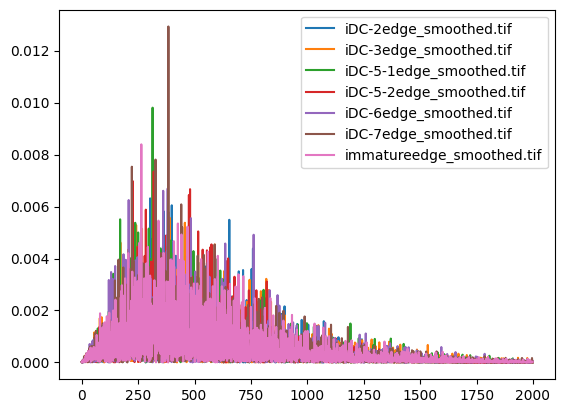

In [39]:
for k in immat_evals_d.keys():
    plt.plot(immat_evals_d[k], label=k)
plt.legend()
plt.show()

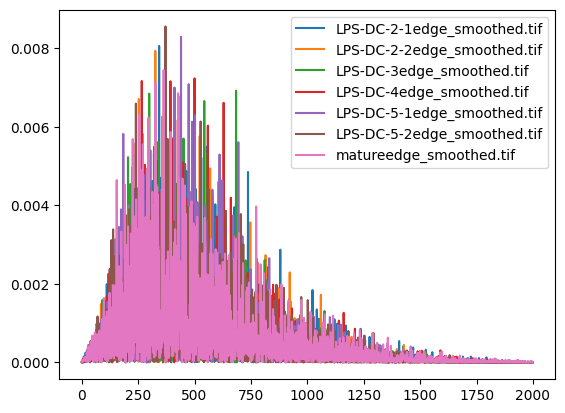

In [40]:
for k in mat_evals_d.keys():
    plt.plot(mat_evals_d[k], label=k)
plt.legend()
plt.show()

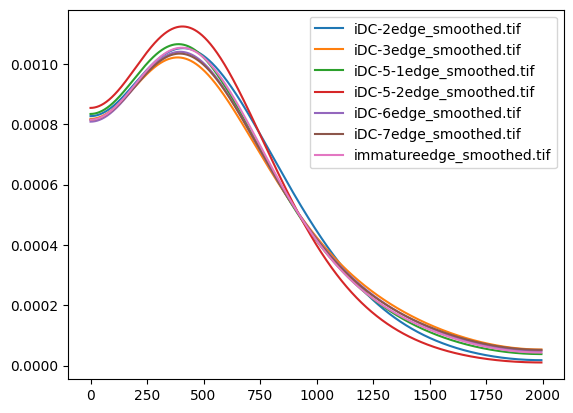

In [42]:
for k in immat_smoothed_d.keys():
    plt.plot(immat_smoothed_d[k], label=k)
plt.legend()
plt.show()

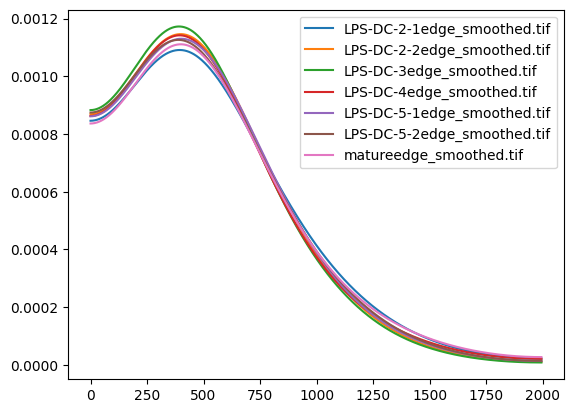

In [41]:
for k in mat_smoothed_d.keys():
    plt.plot(mat_smoothed_d[k], label=k)
plt.legend()
plt.show()

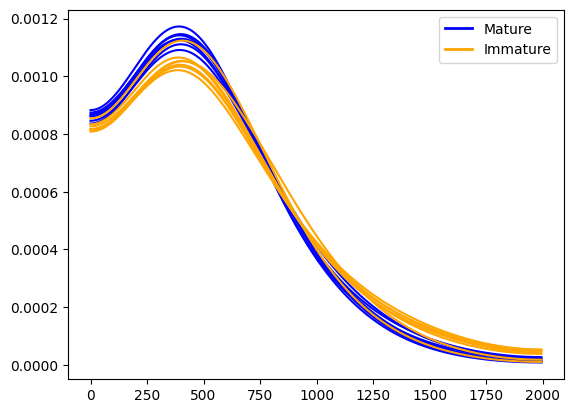

In [49]:
# There is mathematical basis to distinguish these curves using machine learning, i.e. support vector machine
from matplotlib.lines import Line2D
for k in mat_evals.keys():
    plt.plot(mat_smoothed_d[k][:], color="blue")
for k in immat_evals.keys():
    plt.plot(immat_smoothed_d[k][:], color="orange")
plt.legend(handles=[Line2D([0], [0], color='b', lw=2, label='Mature'), Line2D([0], [0], color='orange', lw=2, label='Immature')])
plt.show()

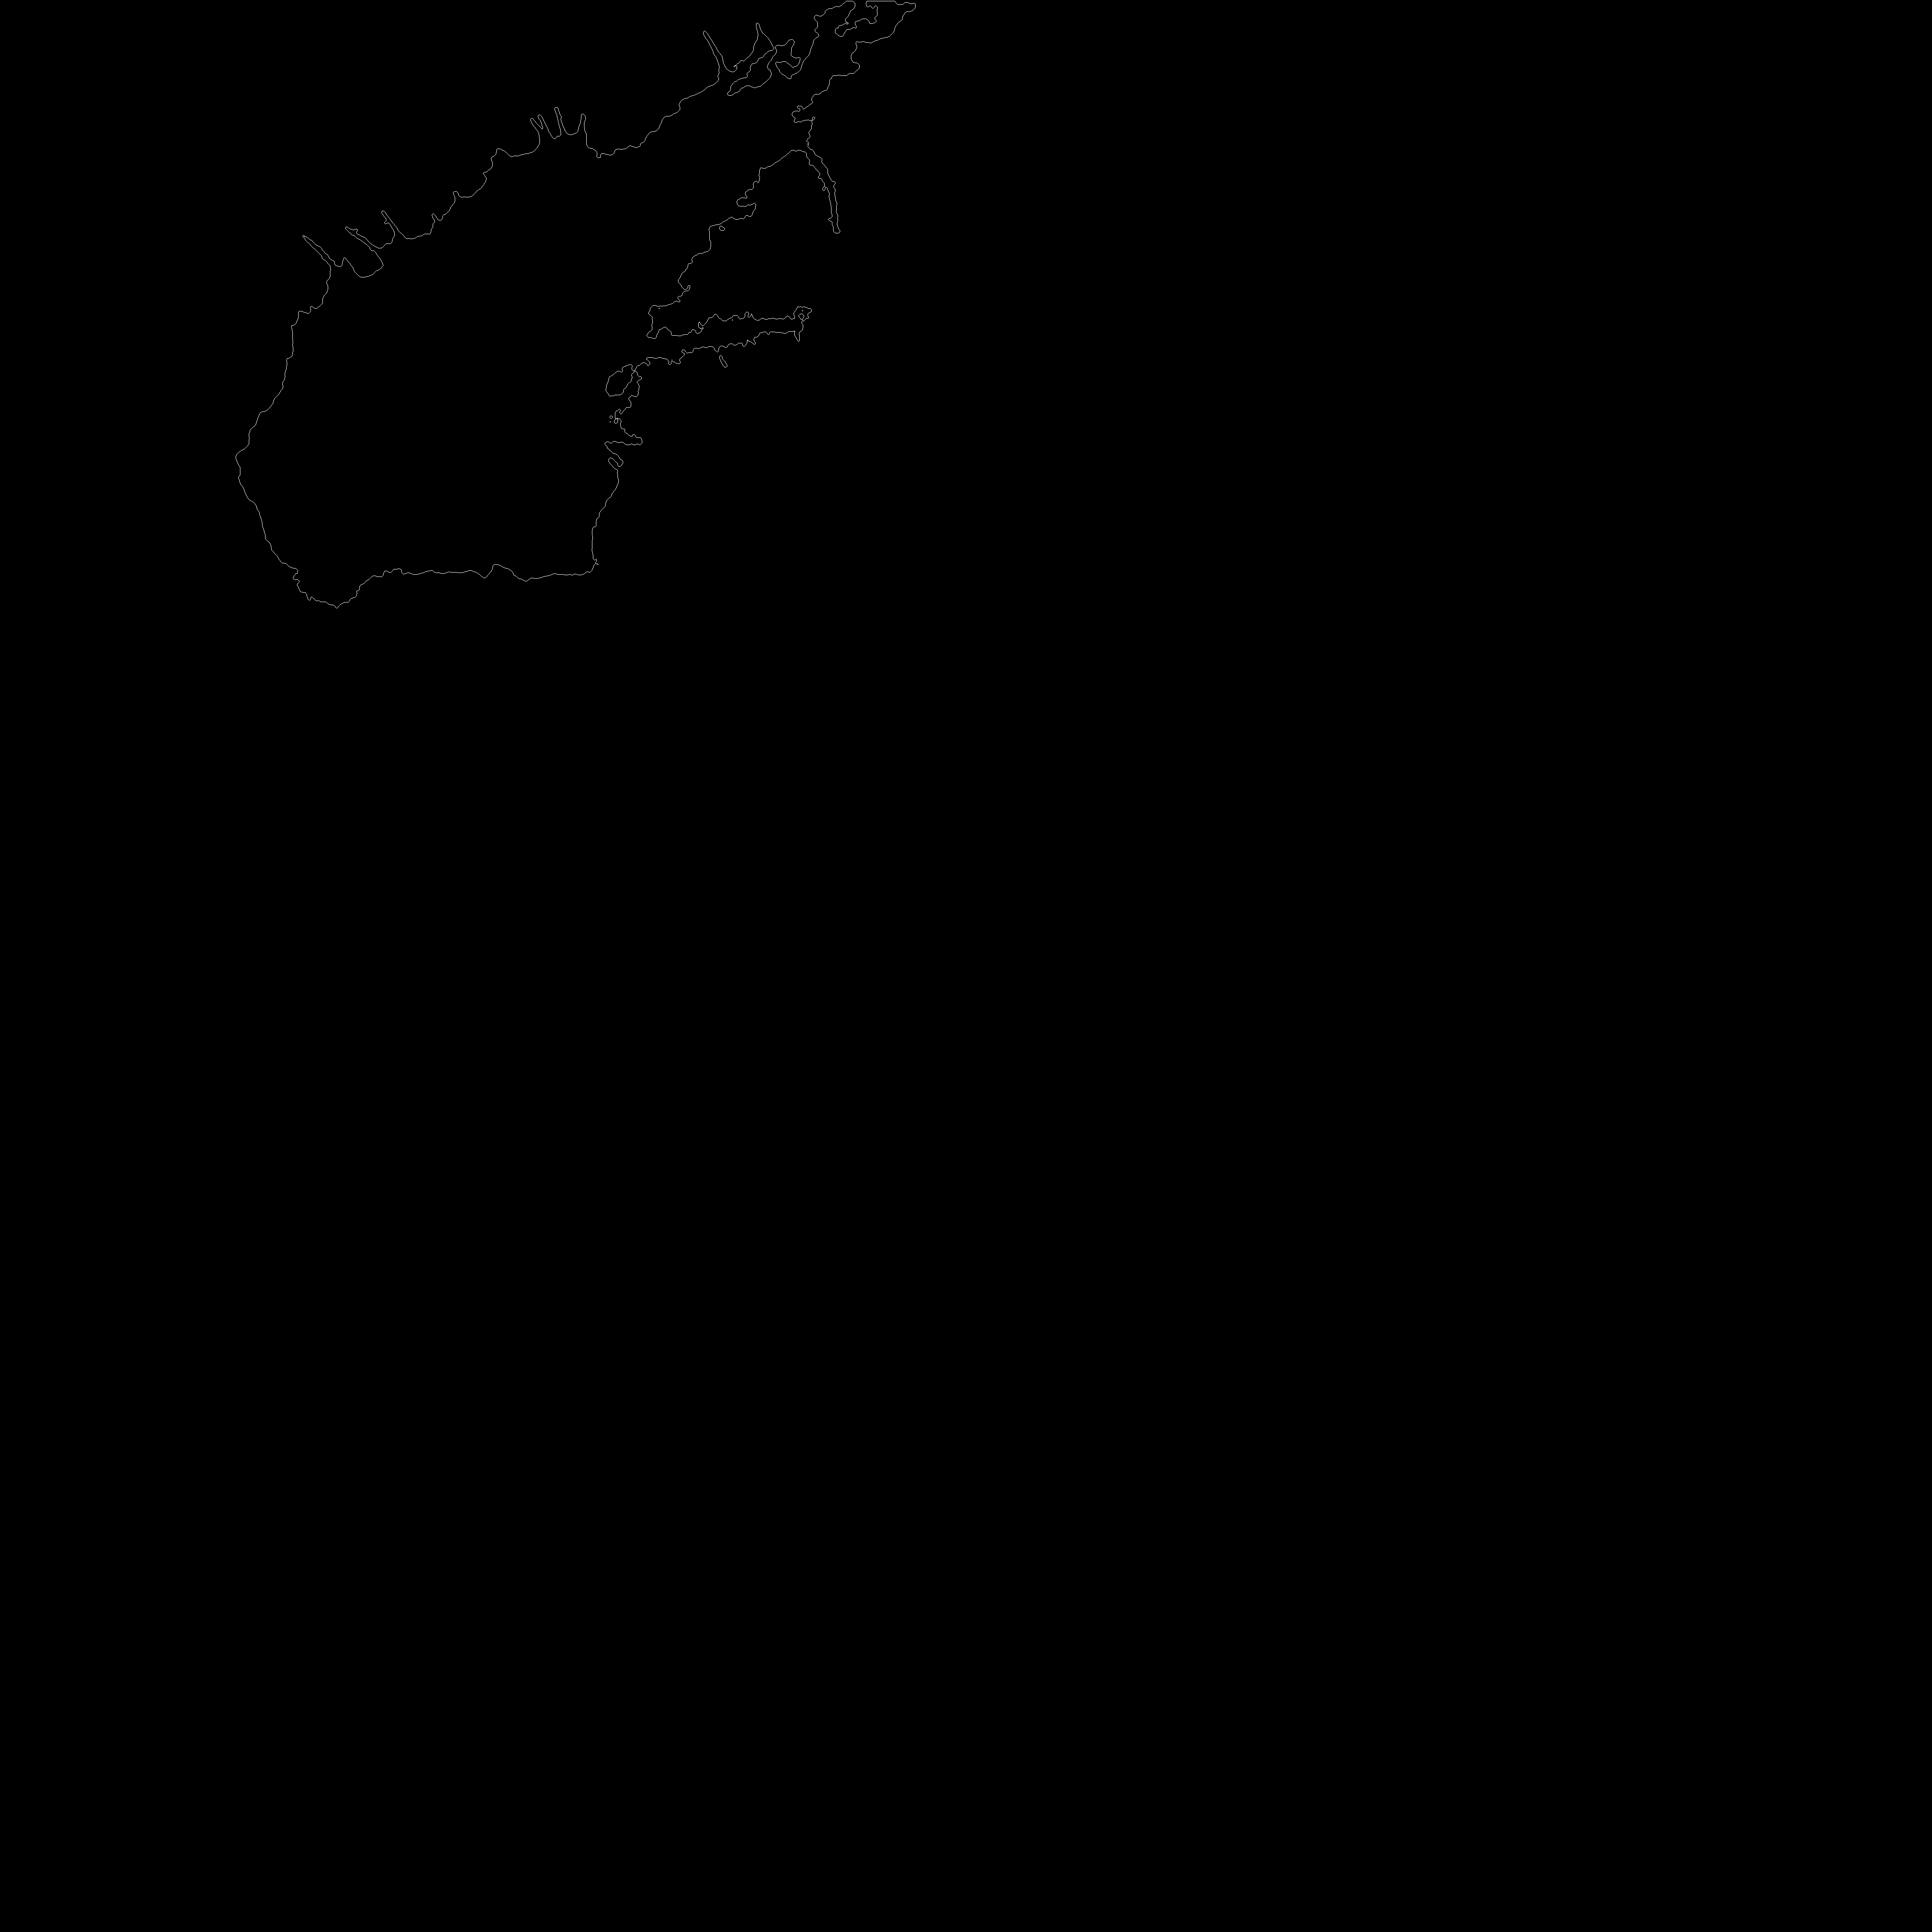

In [52]:
# Not a representative sample. Lacks the spindles that we would expect.
outlier = Image.open(os.path.join(immat_dir, "iDC-5-2edge_smoothed.tif"))
outlier